# Modelo de Regresión Simple

In [1]:
import pandas as pd
import numpy as np

In [2]:
from sklearn.linear_model import LinearRegression

In [3]:
salarios = pd.read_csv('Salary.csv')

In [4]:
salarios.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [5]:
salarios.describe()

,YearsExperience,Salary
count,35.000000,35.000000
mean,6.308571,83945.600000
std,3.618610,32162.673003
min,1.100000,37731.000000
25%,3.450000,57019.000000
50%,5.300000,81363.000000
75%,9.250000,113223.500000
max,13.500000,139465.000000


In [6]:
salarios.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35 entries, 0 to 34
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  35 non-null     float64
 1   Salary           35 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 688.0 bytes


**Pregunta a resolver** : Determinar cual es el salario de un trabajador basado en el número de años de experiencia

In [7]:
#Aqui le pregunto si existen sesgos en mis datos
salarios.skew()

YearsExperience    0.420163
Salary             0.209005
dtype: float64

In [8]:
import seaborn as sns

<Axes: xlabel='Salary'>

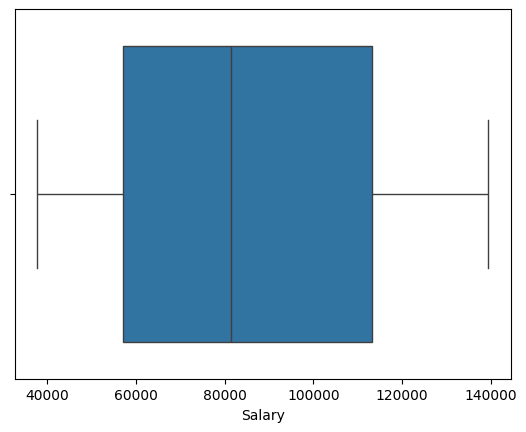

In [9]:
sns.boxplot(x=salarios['Salary'])

<Axes: xlabel='YearsExperience'>

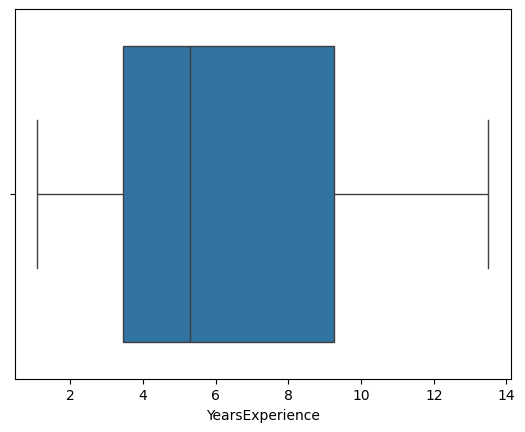

In [10]:
sns.boxplot(x=salarios['YearsExperience'])

<Axes: xlabel='YearsExperience', ylabel='Salary'>

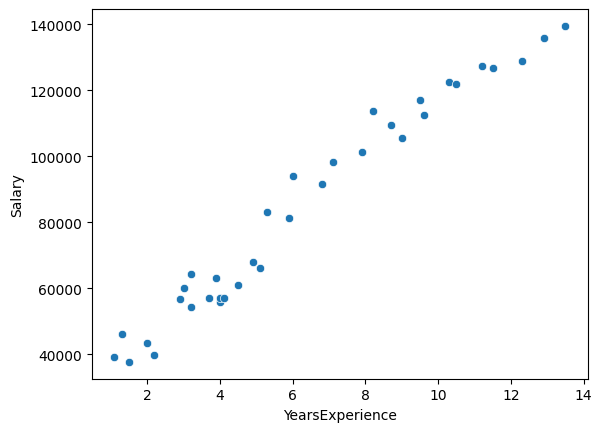

In [11]:
sns.scatterplot(x=salarios['YearsExperience'], y=salarios['Salary'])

In [12]:
model = LinearRegression()

In [13]:
x = salarios[['YearsExperience']]
y = salarios['Salary']

In [14]:
y.shape

(35,)

In [15]:
lineal_regresion = model.fit(x,y)

In [16]:
lineal_regresion.coef_

array([8731.94104706])

In [17]:
lineal_regresion.intercept_

np.float64(28859.52619453144)

### Una forma de calcular una prediccion

In [18]:
model_ = lineal_regresion.intercept_ + lineal_regresion.coef_ * 2

In [19]:
model_

array([46323.40828866])

### otra forma de predecir

In [20]:
y_pred = lineal_regresion.predict(x)
y_pred

array([ 38464.6613463 ,  40211.04955571,  41957.43776513,  46323.40828866,
        48069.79649807,  54182.15523101,  55055.34933572,  56801.73754513,
        56801.73754513,  61167.70806866,  62914.09627808,  63787.29038278,
        63787.29038278,  64660.48448749,  68153.26090631,  71646.03732514,
        73392.42553455,  75138.81374396,  80377.9783722 ,  81251.17247691,
        88236.72531456,  90856.30762868,  97841.86046633, 100461.44278044,
       104827.41330398, 107446.99561809, 111812.96614163, 112686.16024633,
       118798.51897928, 120544.90718869, 126657.26592163, 129276.84823575,
       136262.4010734 , 141501.56570164, 146740.73032988])

### calcular R cuadrado

In [21]:
lineal_regresion.score(x,y)

0.9651633106751443

In [22]:
import matplotlib.pyplot as plt

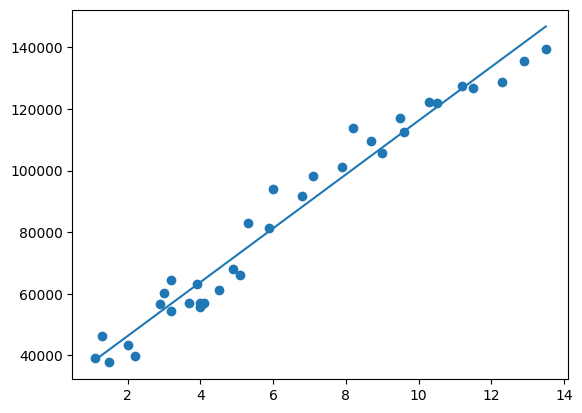

In [23]:
plt.scatter(x,y)
plt.plot(x,y_pred)

# Regresion lineal multiple

In [24]:
datos = pd.read_csv('advertising.csv')
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [25]:
datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


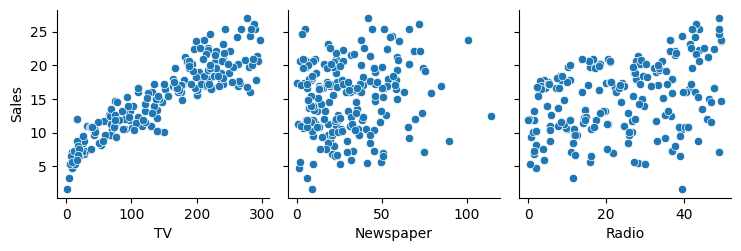

In [26]:
sns.pairplot(datos,x_vars=['TV','Newspaper','Radio'], y_vars='Sales')

In [30]:
datos.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,15.130500
std,85.854236,14.846809,21.778621,5.283892
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,11.000000
50%,149.750000,22.900000,25.750000,16.000000
75%,218.825000,36.525000,45.100000,19.050000
max,296.400000,49.600000,114.000000,27.000000


<Axes: >

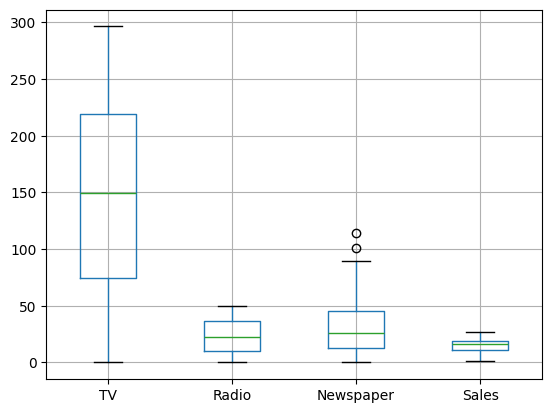

In [31]:
datos.boxplot()

array([[<Axes: title={'center': 'TV'}>,
        <Axes: title={'center': 'Radio'}>],
       [<Axes: title={'center': 'Newspaper'}>,
        <Axes: title={'center': 'Sales'}>]], dtype=object)

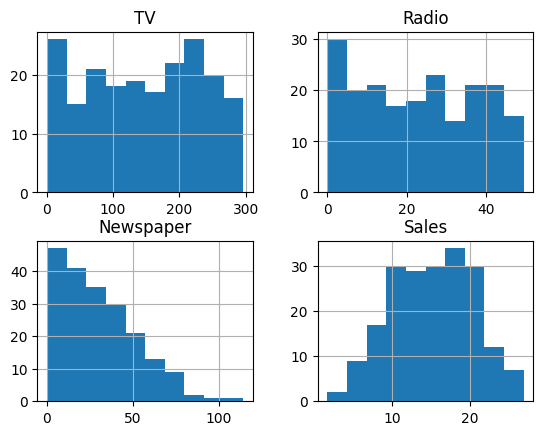

In [32]:
datos.hist()

In [33]:
datos.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.901208
Radio,0.054809,1.000000,0.354104,0.349631
Newspaper,0.056648,0.354104,1.000000,0.157960
Sales,0.901208,0.349631,0.157960,1.000000


In [ ]:
%pip install statsmodels

# Cálculo de VIF para saber la multicolinealidad de las variables independientes

### **Interpretación**
VIF=1 significa que no existe correlación entre esta variable independiente y cualquier otra. 
1< VIF < 5 sugiere una correlación moderada pero no sería necesario resolverla.
VIF > 5 son niveles críticos de multicolinealidad.

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
x = datos[['TV','Radio','Newspaper']]
x = add_constant(x)

VIF_data = pd.DataFrame()
VIF_data['Variable'] = x.columns
VIF_data['VIF'] = [variance_inflation_factor(x.values,i) for i in range (x.shape[1])]
VIF_data

,Variable,VIF
0,const,6.848900
1,TV,1.004611
2,Radio,1.144952
3,Newspaper,1.145187


In [43]:
modelo = LinearRegression()

In [44]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales']

### para entrenar el modelo se usa modelo.fit(X,y)

In [49]:
regresion_lineal = model.fit(X,y)

In [50]:
model.coef_

array([0.05444578, 0.10700123, 0.00033566])

In [52]:
model.intercept_

np.float64(4.625124078808653)

In [60]:
sales_pred = model.predict(X)

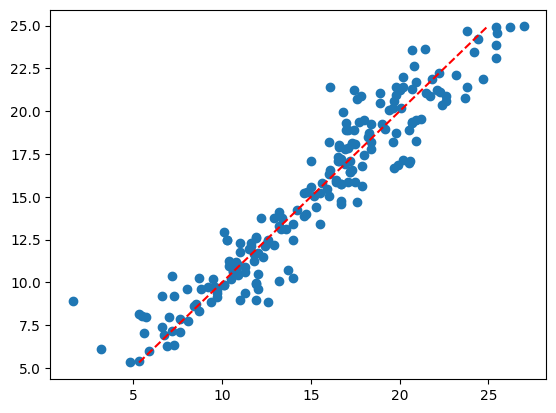

In [65]:
plt.scatter(datos['Sales'],sales_pred)
plt.plot([sales_pred.min(), sales_pred.max()], [sales_pred.min(), sales_pred.max()], '--r' )

### R cuadrado

In [66]:
model.score(X,y)

0.9025912899684558

In [69]:
model.score(X,y)

0.9025912899684558

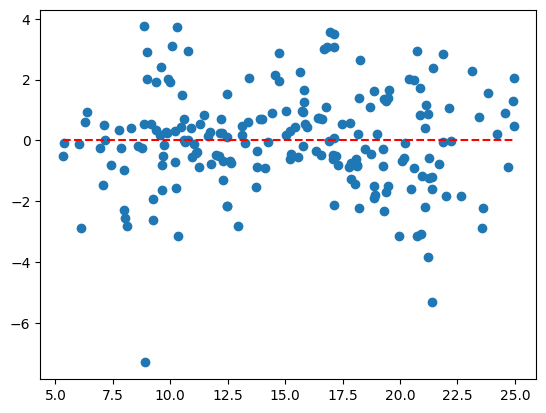

In [73]:
residuos = y-sales_pred
plt.scatter(sales_pred,residuos)
plt.hlines(y=0, xmin=sales_pred.min(),xmax=sales_pred.max(),linestyles='--',colors='r')

In [74]:
import statsmodels.api as sm
from statsmodels.tools.tools import add_constant

In [76]:
X_2 = datos[['TV','Radio','Newspaper']]
X_2 = add_constant(X_2)


y_2 = datos['Sales']


### en esta librería sm.OLS es el modelo de mínimos cuadrados, luego se pone primero la y a diferencia del anterior y despues se pone el .fit

In [79]:
model_2 = sm.OLS(y_2,X_2).fit()
model_2.params

const        4.625124
TV           0.054446
Radio        0.107001
Newspaper    0.000336
dtype: float64

In [78]:
model_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.903
Model:                            OLS   Adj. R-squared:                  0.901
Method:                 Least Squares   F-statistic:                     605.4
Date:                Wed, 10 Jul 2024   Prob (F-statistic):           8.13e-99
Time:                        18:35:26   Log-Likelihood:                -383.34
No. Observations:                 200   AIC:                             774.7
Df Residuals:                     196   BIC:                             787.9
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.6251      0.308     15.041      0.000       4.019       5.232
TV             0.0544      0.001     39.592      0.000       0.052       0.057
Radio          0.1070      0.008     12.604      0.000       0.090       0.124
Newspaper      0.0003      0.006      0.058      0.954      -0.011       0.012
==============================================================================
Omnibus:                       16.081   Durbin-Watson:                   2.251
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               27.655
Skew:                          -0.431   Prob(JB):                     9.88e-07
Kurtosis:                       4.605   Cond. No.                         454.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# Regresión con PCR

In [84]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from

In [85]:
datos = pd.read_csv('advertising.csv')
datos.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,12.0
3,151.5,41.3,58.5,16.5
4,180.8,10.8,58.4,17.9


In [87]:
modelo = Pipeline([
    ('scaler',StandardScaler()),
    ('pca', PCA()),
    ('regresion',LinearRegression())
])

In [88]:
X = datos[['TV','Radio','Newspaper']]
y = datos['Sales'] 

In [89]:
modelo.fit(X,y)

Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])

In [90]:
modelo.get_params

<bound method Pipeline.get_params of Pipeline(steps=[('scaler', StandardScaler()), ('pca', PCA()),
                ('regresion', LinearRegression())])>

In [ ]:
modelo.predict(X)

In [93]:
regresor = modelo.named_steps['regresion']

In [96]:
regresor.intercept_

np.float64(15.130500000000001)

In [94]:
regresor.coef_

array([ 2.06992121,  4.32260897, -1.13244033])

In [97]:
pca = modelo.named_steps['pca']
pca.components_

array([[ 0.20787391,  0.69139674,  0.69192412],
       [ 0.97814838, -0.14965532, -0.14432267],
       [-0.0037659 , -0.70680537,  0.70739804]])

### obtención de R cuadrado

In [99]:
from sklearn.metrics import r2_score

score = r2_score(y,modelo.predict(X))

In [100]:
score

0.9025912899684558

# Regresión no lineal

In [101]:
import pandas as pd
import matplotlib.pyplot as plt

In [102]:
datos = pd.read_csv('ExpansiónCobre.csv')
datos.head()

,Expansión,Kelvin
0,0.591,24.41
1,1.547,34.82
2,2.902,44.09
3,2.894,45.07
4,4.703,54.98


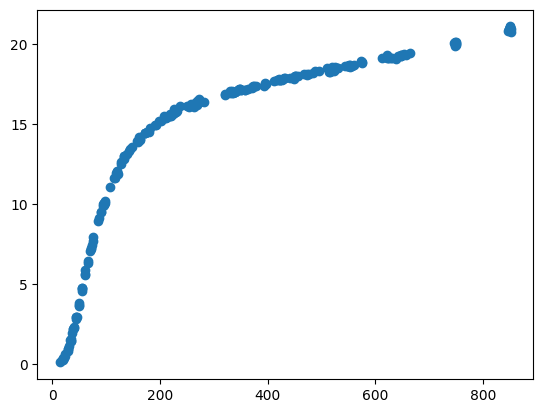

In [104]:
plt.scatter(datos['Kelvin'],datos['Expansión'])

In [105]:
import numpy as np

In [106]:
def logistica(t,a,m,n,tau):
    return a*(1+m*np.exp(-t/tau))/(1+n*np.exp(-t/tau))

In [133]:
def polinomio(x,a,b,c,d,e,f):
    return a + b * x+c * x**2 + d * x**3 + e * x**4 + f * x**5

In [125]:
X = datos['Kelvin'].values
y = datos['Expansión'].values

In [135]:
from scipy.optimize import curve_fit

In [136]:
params, params_cov = curve_fit(polinomio,X,y)

In [137]:
params_cov

array([[ 1.17549247e-02, -2.68247125e-04,  1.79005120e-06,
        -4.94196275e-09,  5.98688779e-12, -2.63260452e-15],
       [-2.68247125e-04,  7.28533253e-06, -5.23625775e-08,
         1.50678821e-10, -1.87424749e-13,  8.39283698e-17],
       [ 1.79005120e-06, -5.23625775e-08,  3.95989506e-10,
        -1.17898527e-12,  1.50208533e-15, -6.84533604e-19],
       [-4.94196275e-09,  1.50678821e-10, -1.17898527e-12,
         3.59950878e-15, -4.67311676e-18,  2.16048595e-21],
       [ 5.98688779e-12, -1.87424749e-13,  1.50208533e-15,
        -4.67311676e-18,  6.15723774e-21, -2.88000389e-24],
       [-2.63260452e-15,  8.39283698e-17, -6.84533604e-19,
         2.16048595e-21, -2.88000389e-24,  1.35986317e-27]])

In [138]:
y_pred = polinomio(X, *params)

In [116]:
from sklearn.metrics import r2_score, mean_squared_error

In [139]:
r2_score(y,y_pred)

0.9976197258484248

In [140]:
mean_squared_error(y,y_pred)

np.float64(0.07887451238854884)

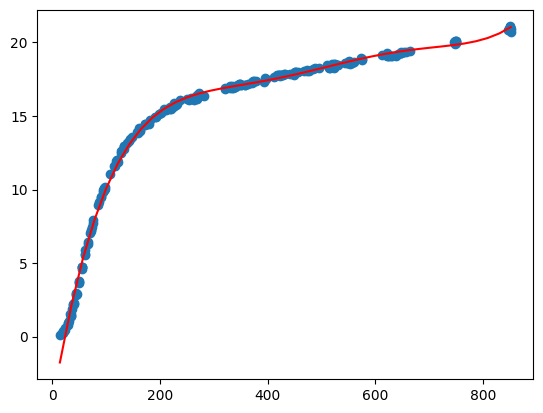

In [141]:
kelvin = np.linspace(X.min(),X.max(),40)
plt.scatter(X,y)
plt.plot(kelvin,polinomio(kelvin,*params),color = 'r')

In [123]:
def polinomio(x,a,b,c,d,e):
    return a + b * x+c * x**2 + d * x**3 + e * x**4

# División dataset

In [142]:
import pandas as pd
import matplotlib.pyplot as plt

In [147]:
df = pd.read_csv('ExpansiónCobre.csv')
X = df['Kelvin'].values
y = df['Expansión'].values

### el siguiente comando hace la selección de manera aleatoria

In [145]:
from sklearn.model_selection import train_test_split

In [148]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [149]:
X_train.shape

(188,)

In [150]:
def polinomio(x,a,b,c,d,e,f):
    return a + b * x+c * x**2 + d * x**3 + e * x**4 + f * x**5

In [153]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

params, params_cov = curve_fit(polinomio,X_train,y_train)

y_pred_train = polinomio(X_train,*params)
y_pred_test = polinomio(X_test,*params)

In [154]:
mean_squared_error(y_train,y_pred_train)

np.float64(0.08185008928359196)

In [155]:
mean_squared_error(y_test,y_pred_test)

np.float64(0.06889553320513721)

In [158]:
#%pip install kennard-stone

In [157]:
from kennard_stone import train_test_split

### Para usar kennard o selección representativa por distancias se debe de cambiar el vetor a vector columna esto se ve reflejado en x=df['kelvin'].values.reshape(-1,1)

In [160]:
df = pd.read_csv('ExpansiónCobre.csv')
X = df['Kelvin'].values.reshape(-1,1)
y = df['Expansión'].values

In [161]:
X.shape

(236, 1)

In [162]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

Calculating pairwise distances using scikit-learn.
Calculating pairwise distances using scikit-learn.


In [163]:
def polinomio(x,a,b,c,d,e,f):
    return a + b * x+c * x**2 + d * x**3 + e * x**4 + f * x**5

### En este caso la función curve fit no ocupa el vector columna si no vector, eso se cambia en X_train.flatten()

In [164]:
from scipy.optimize import curve_fit
from sklearn.metrics import r2_score, mean_squared_error

params, params_cov = curve_fit(polinomio,X_train.flatten(),y_train)

y_pred_train = polinomio(X_train,*params)
y_pred_test = polinomio(X_test,*params)

In [165]:
mean_squared_error(y_train,y_pred_train)

np.float64(0.07637715605457467)

In [166]:
mean_squared_error(y_test,y_pred_test)

np.float64(0.09306621227256441)